### Reddit AMA sentiment analysis sample IPython notebook

This is a sample notebook demonstrating how to perform sentiment analysis on Reddit AMA posts via cloudant-spark connector [link to cloudant-spark]. A sample NodeJS application, Simple-data-pipe provides an easy interface to create new connectors such as Reddit AMA and bring data into Cloudant first and then access it via IPython kernel.

During a recent IBM Reddit AMA:

[View histogram of comments by sentiments > 70%](#Histogram)

[List comments by sentiments of top Reddit AMA posts](#CommentsBySentiments)



In [1]:
from pyspark import SparkContext, SparkConf

Connect to an existing SparkContext.

In [2]:
sqlContext = SQLContext(sc)

Connect to the cloudant database service that you have created with IBM Bluemix. The format of the connecting api is:

sqlContext.read.format("com.cloudant.spark").option("cloudant.host","XXXXX-bluemix.cloudant.com").option("cloudant.username", "XXXXX-bluemix").option("cloudant.password","XXXXX").load("sample database name")

In [3]:
df = sqlContext.read.format("com.cloudant.spark").option("cloudant.host","XXXXX-bluemix.cloudant.com").option("cloudant.username", "XXXXX-bluemix").option("cloudant.password","XXXXX").load("reddit_demotable")

Print database scheme off the Cloudant DataFrame returned by the cloudant-spark connector as starting point into analytics.

In [4]:
df.printSchema()

root
 |-- Agreeableness: double (nullable = true)
 |-- Analytical: long (nullable = true)
 |-- Anger: long (nullable = true)
 |-- Cheerfulness: long (nullable = true)
 |-- Confident: long (nullable = true)
 |-- Conscientiousness: long (nullable = true)
 |-- Negative: long (nullable = true)
 |-- Openness: long (nullable = true)
 |-- Tentative: long (nullable = true)
 |-- _id: string (nullable = true)
 |-- _rev: string (nullable = true)
 |-- author: string (nullable = true)
 |-- created: long (nullable = true)
 |-- edited: boolean (nullable = true)
 |-- id: string (nullable = true)
 |-- pt_type: string (nullable = true)
 |-- text: string (nullable = true)
 |-- title: string (nullable = true)



Display top 20 rows of DataFrame in a tabular format.

In [5]:
df.show()

+------------------+-----------------+-----------------+------------------+-----------------+------------------+-----------------+------------------+-----------------+--------------------+--------------------+--------------+----------+----------+-------+---------+--------------------+--------------------+
|     Agreeableness|       Analytical|            Anger|      Cheerfulness|        Confident| Conscientiousness|         Negative|          Openness|        Tentative|                 _id|                _rev|        author|   created|    edited|     id|  pt_type|                text|               title|
+------------------+-----------------+-----------------+------------------+-----------------+------------------+-----------------+------------------+-----------------+--------------------+--------------------+--------------+----------+----------+-------+---------+--------------------+--------------------+
|0.8211693003519522|              0.0|            100.0|               0.0|    

Register a temporary table with a unique name for performing SQL operations on the Cloudant DataFrame.

In [6]:
df.registerTempTable("reddit");

#### Compute distribution of sentiments as computed by the Watson Tone Analyzer

In this section lets compute distribution of sentiments to populate a Histogram chart showing number of comments by sentiments with values greater than 70%. Higher value of sentiment reflects higher emotional intensity. 

In [7]:
sentimentDistribution=[0] * 9
#for i, sentiment in enumerate(df.columns[-18:9]): print sentiment

for i, sentiment in enumerate(df.columns[-18:9]):
    sentimentDistribution[i]=sqlContext.sql("SELECT count(*) as sentCount FROM reddit where cast(" + sentiment + " as String) > 70.0")\
        .collect()[0].sentCount

In [8]:
print sentimentDistribution

[16, 13, 6, 11, 5, 5, 10, 3, 14]


#Histogram

Barplot displaying histogram of comments by sentiments > 70%.

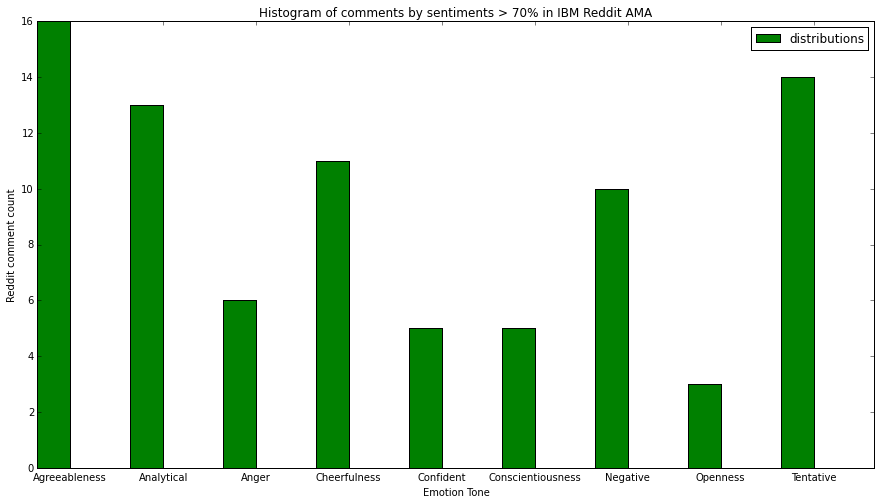

In [9]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
 
ind=np.arange(9)
width = 0.35
bar = plt.bar(ind, sentimentDistribution, width, color='g', label = "distributions")
 
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*2.5, plSize[1]*2) )
plt.ylabel('Reddit comment count')
plt.xlabel('Emotion Tone')
plt.title('Histogram of comments by sentiments > 70% in IBM Reddit AMA')
plt.xticks(ind+width, df.columns[-18:9])
plt.legend()
 
plt.show()

#CommentsBySentiments

Collect and list comments by sentiments, that contributed towards different emotional tones for manual introspection and assist algorithm verification.

In [10]:
comments=[]
#comments.append([])
for i, sentiment in enumerate(df.columns[-18:9]):
    commentset = df.filter("cast(" + sentiment + " as String) > 70.0")
    comments.append(commentset.map(lambda p: p.author + "\n\n" + p.text).collect())
    print "\n--------------------------------------------------------------------------------------------"
    print sentiment
    print "--------------------------------------------------------------------------------------------\n"
    for comment in comments[i]:
        print "[-]  " + comment +"\n"
    


--------------------------------------------------------------------------------------------
Agreeableness
--------------------------------------------------------------------------------------------

[-]  cartenui

Heard horror Stories about how inventors and developers were paid a pizza and a tap on the shoulder for their inventions in the past. Compared to the old days how does people that invent and create things at IBM get treated today? Do you get shares and bonuses for your creativity and ideas?

[-]  acatao2210

What language do you guys use the most? and feel is the most useful?

[-]  FU-allthetime

Are there slides we're supposed to be looking at? Can you send me the deck?

Sorry I was talking on mute.

(just to make you feel at home IBMers)

[-]  iMasterX

Do you still have the IBM5100?

[-]  BabyEatingFox

Do you guys use model m's?

[-]  CrazyAboutCode

Hey Reddit! We're a bunch of developers who like to talk to people. So stereotypes be damned. We work at IBM and like to